Get the errors for each model

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
smooth_model = pd.read_csv("smooth.csv")
ml_lineal_model = pd.read_csv("ml_lineal.csv")

df = pd.read_csv("df_group.csv")
df_all_1 = pd.read_csv("smooth.csv")
df_all_2 = pd.read_csv("ml_lineal.csv")

countries = df_all_1['countryiso3code'].unique().tolist()

x_min = 2014
x_max = 2020

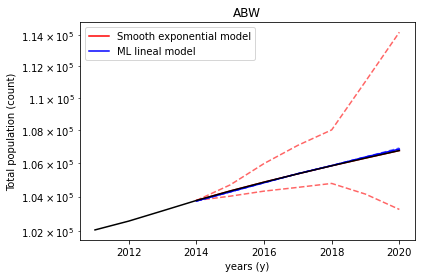

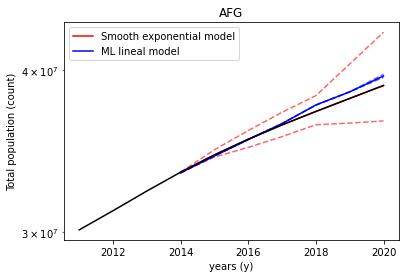

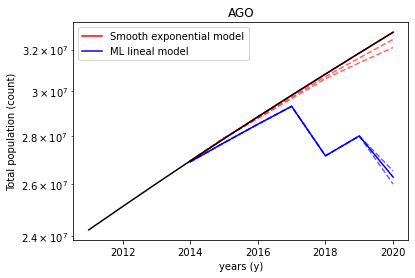

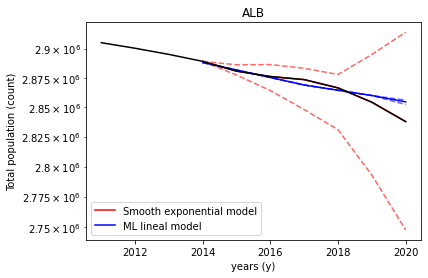

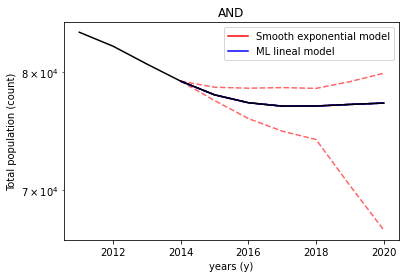

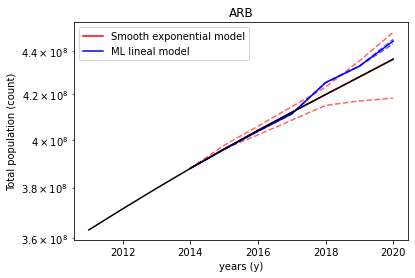

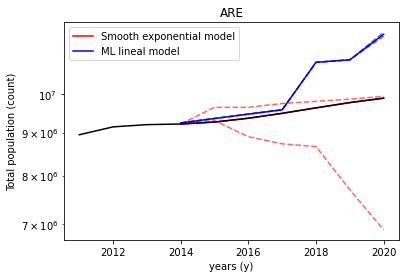

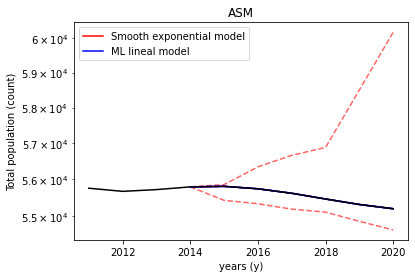

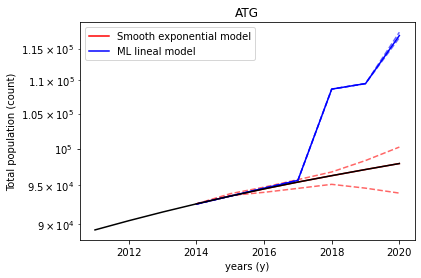

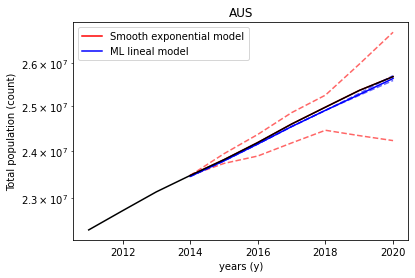

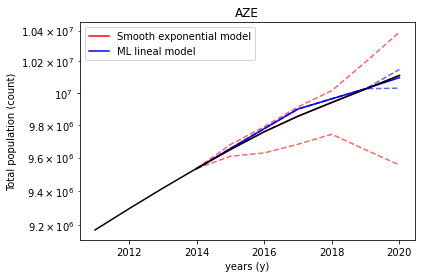

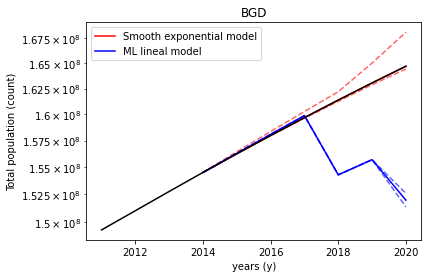

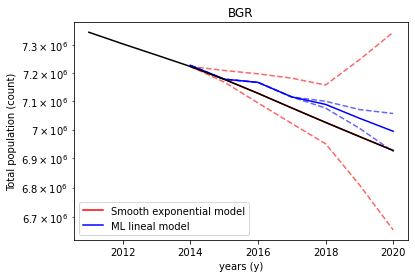

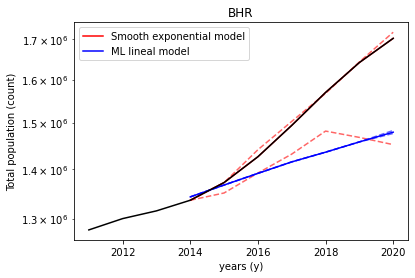

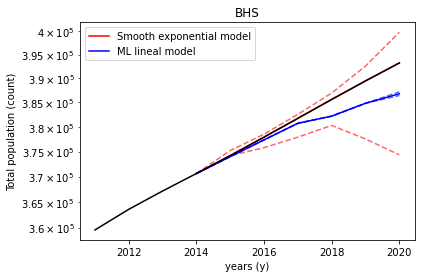

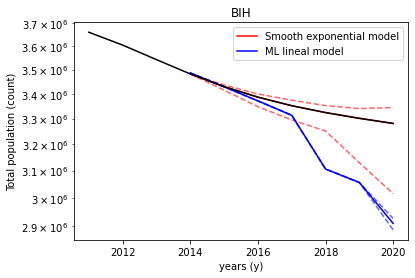

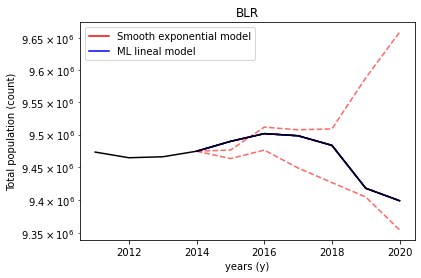

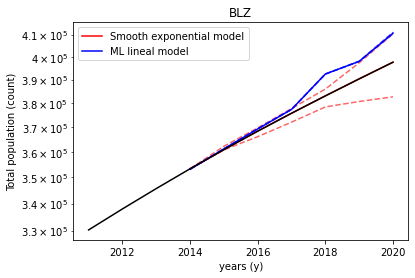

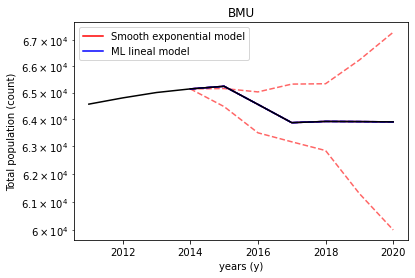

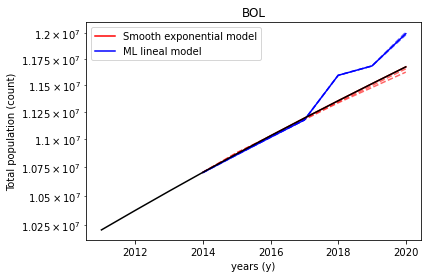

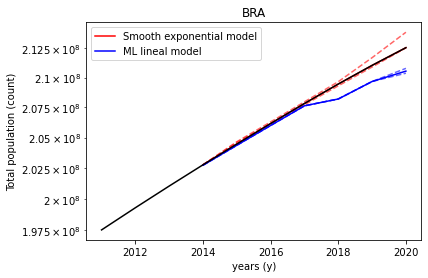

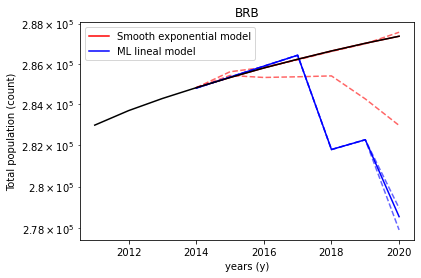

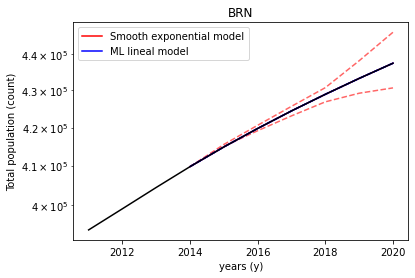

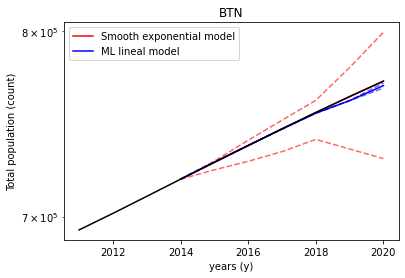

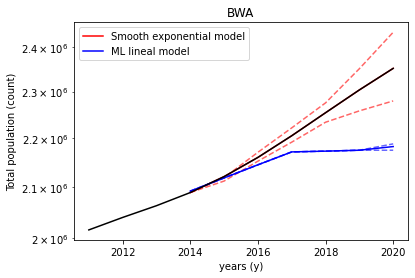

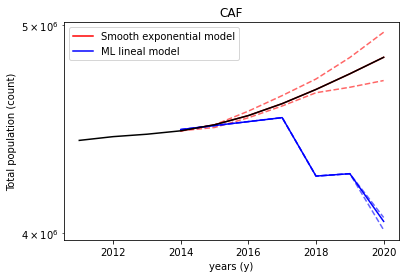

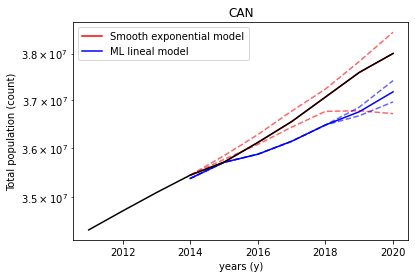

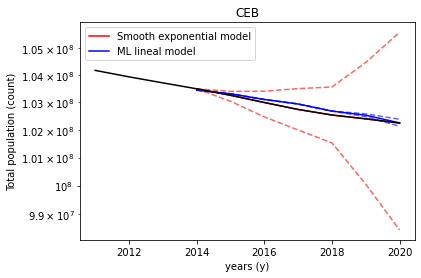

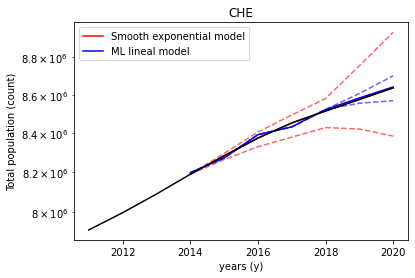

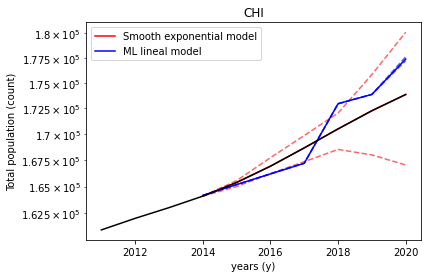

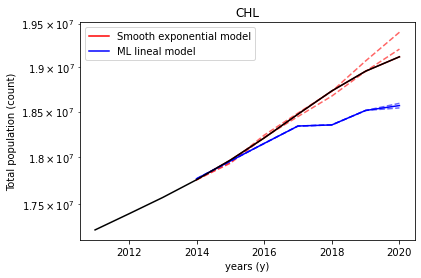

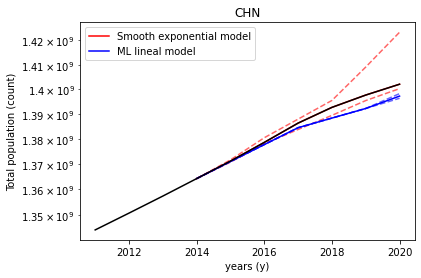

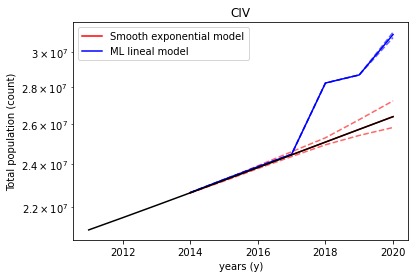

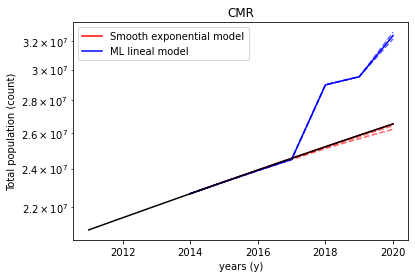

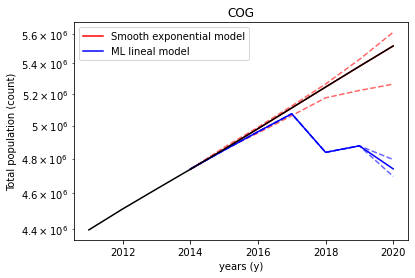

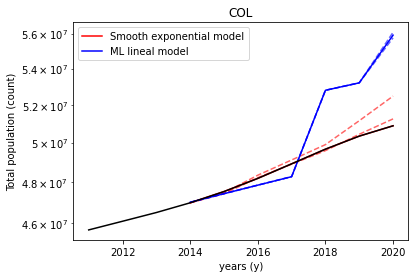

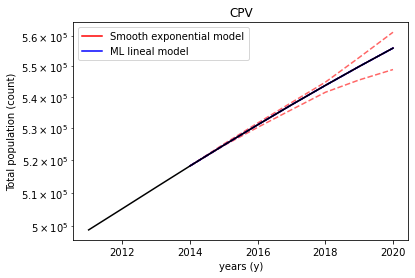

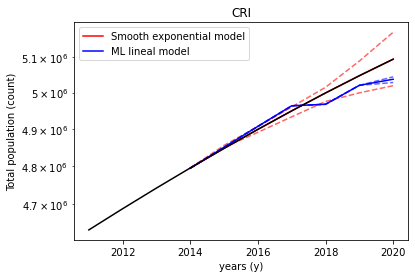

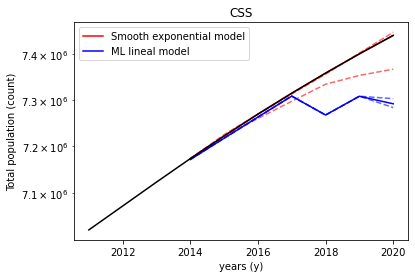

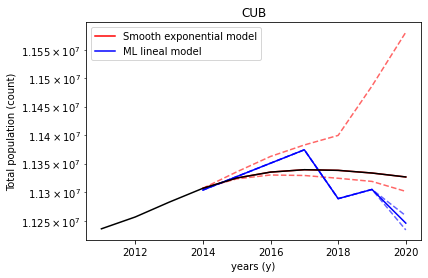

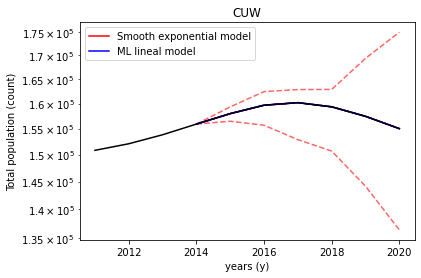

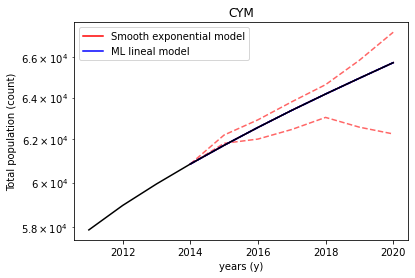

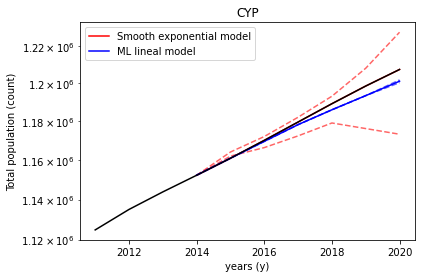

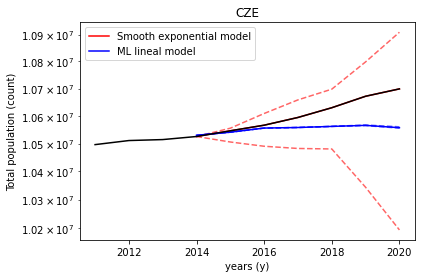

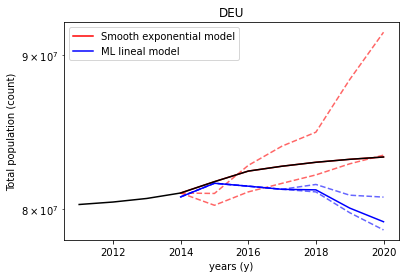

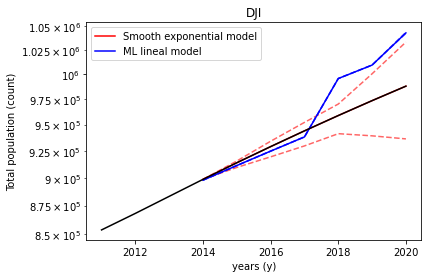

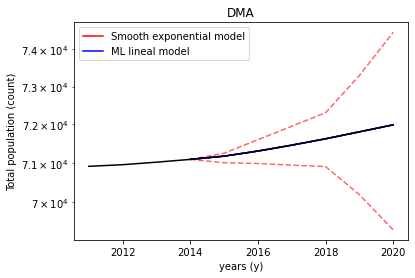

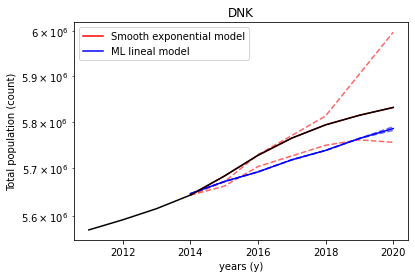

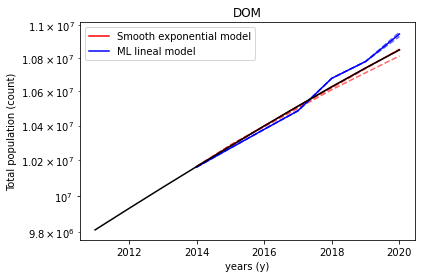

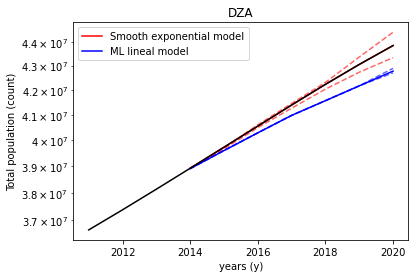

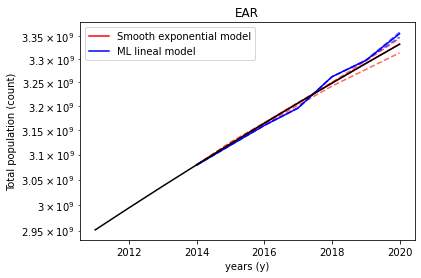

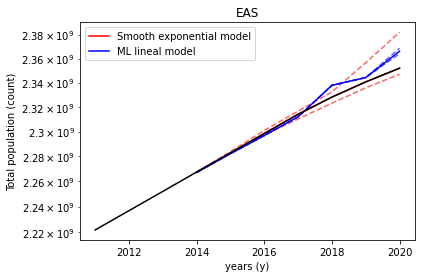

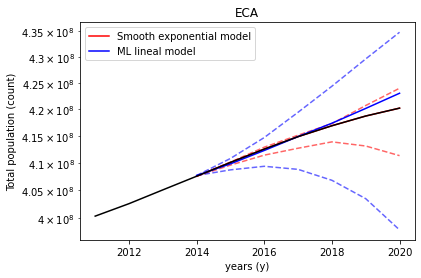

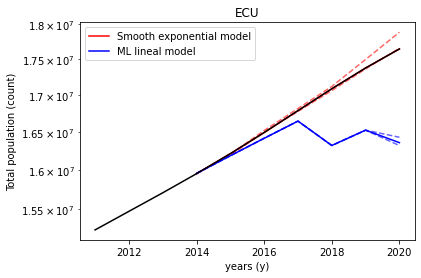

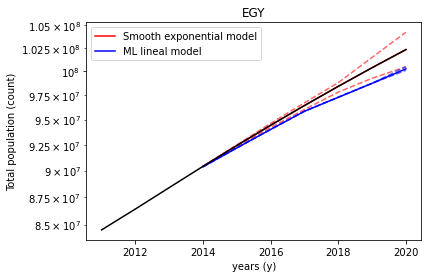

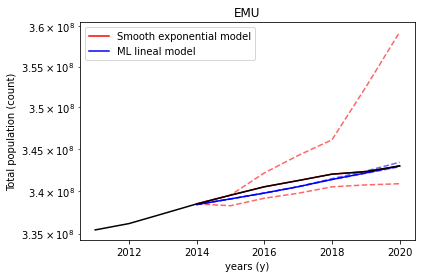

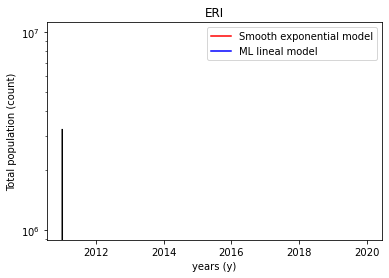

<ipython-input-15-205853186fd0>:39: RuntimeWarning: invalid value encountered in double_scalars
  diff_porcentual.append((y_2.values[-1]-y_1.values[-2])*100/y_2.values[-1])


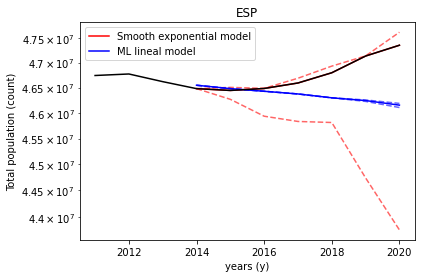

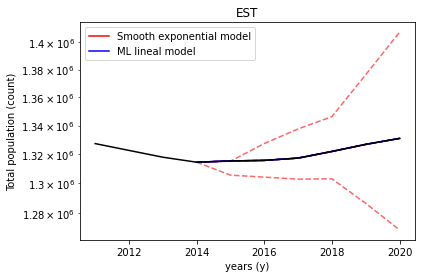

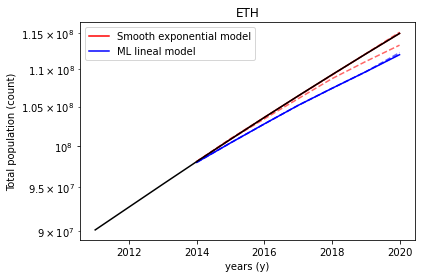

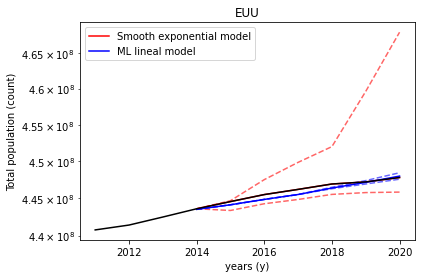

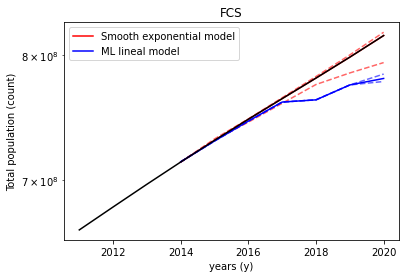

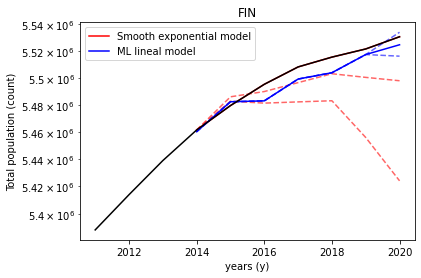

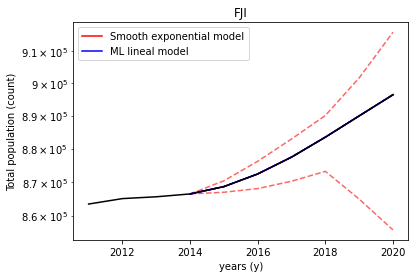

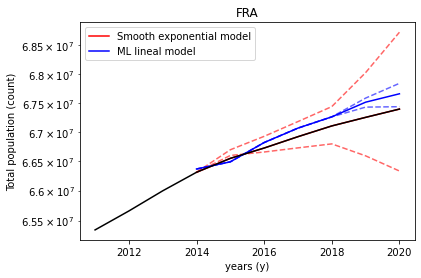

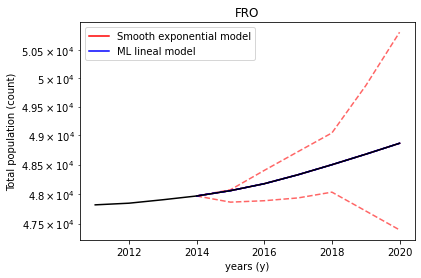

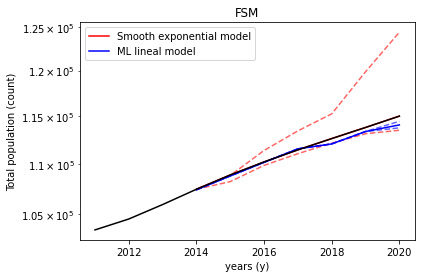

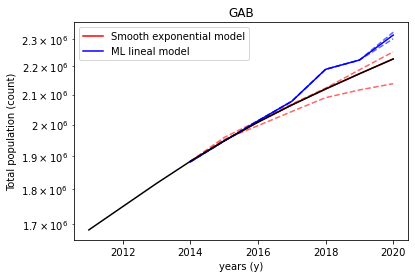

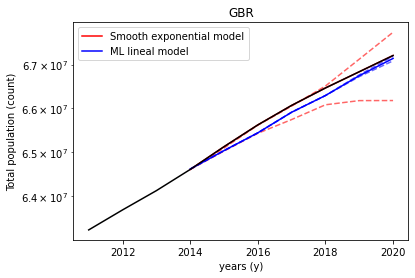

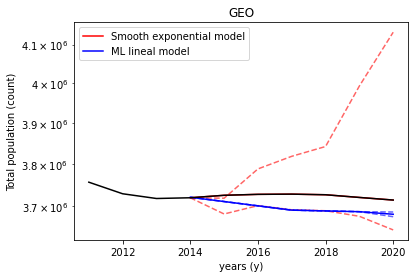

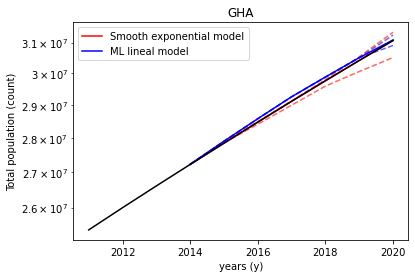

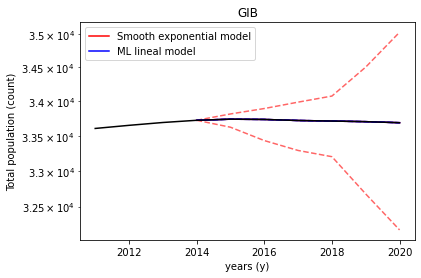

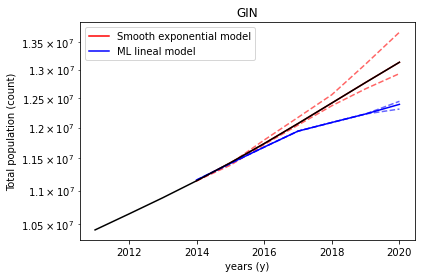

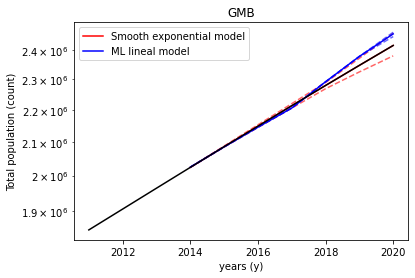

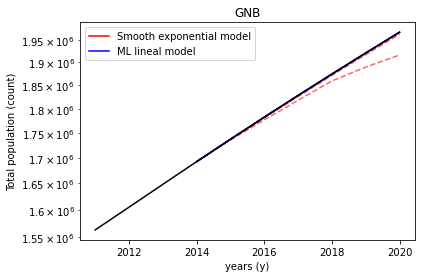

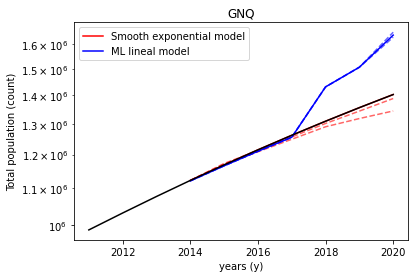

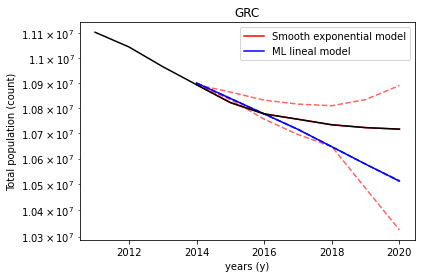

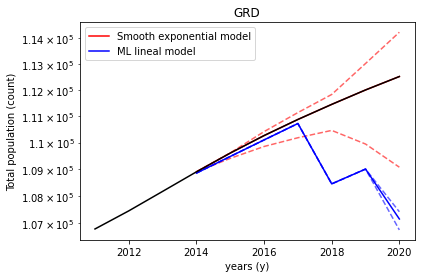

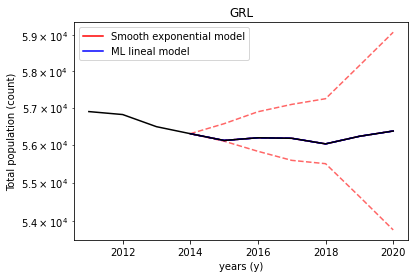

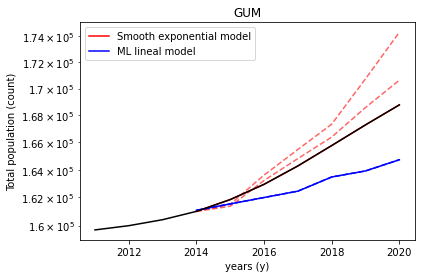

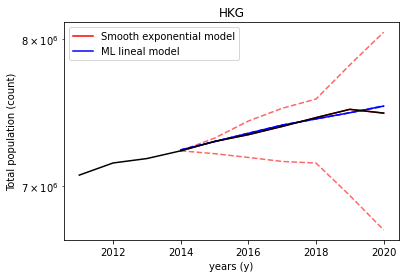

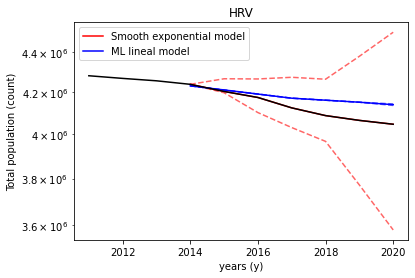

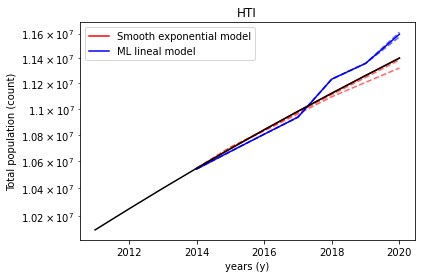

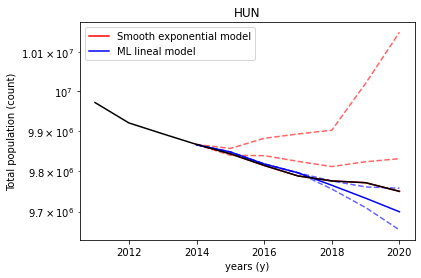

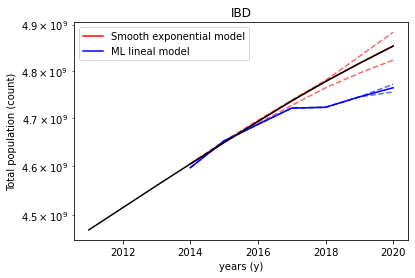

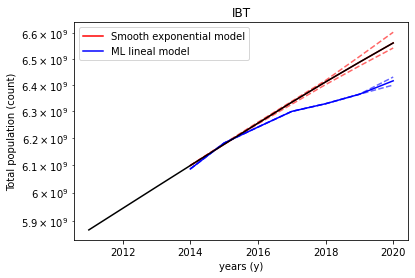

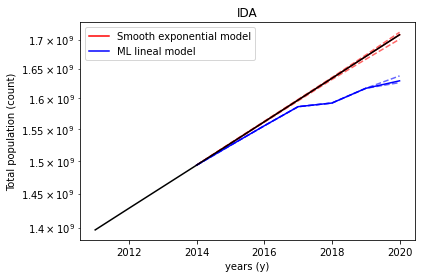

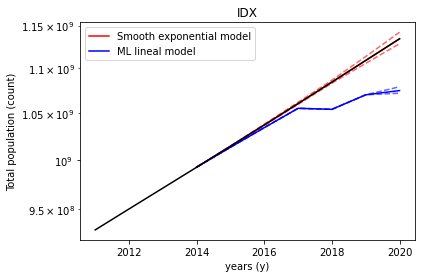

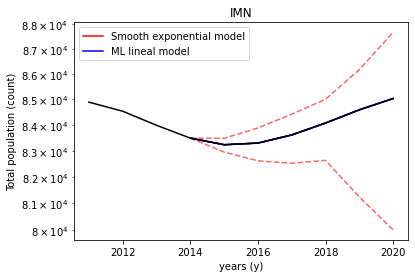

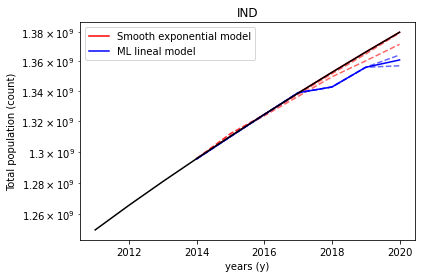

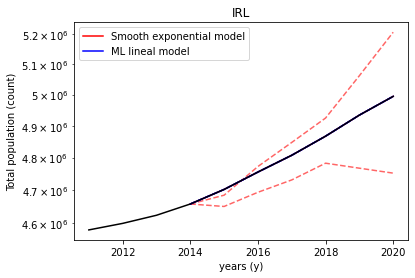

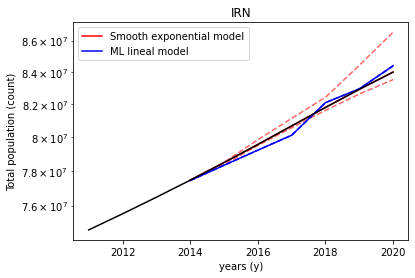

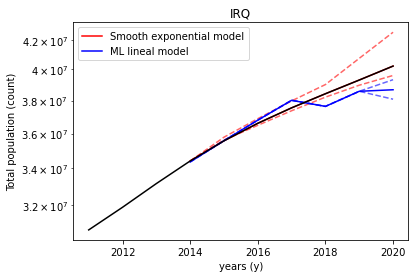

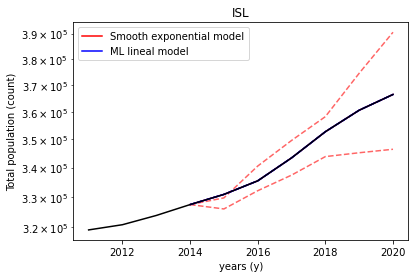

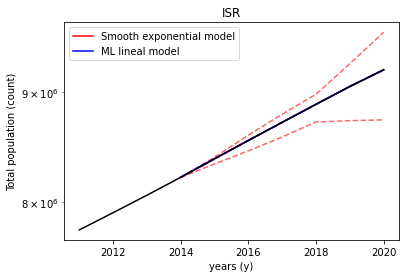

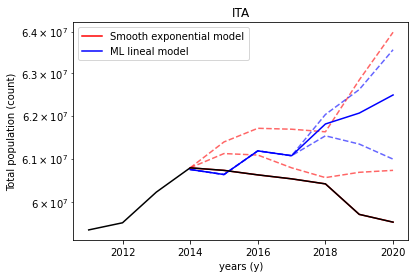

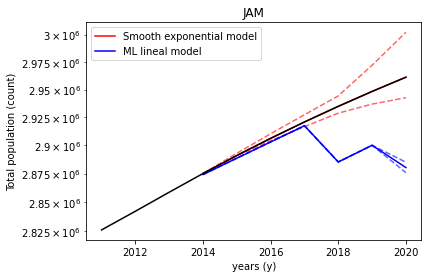

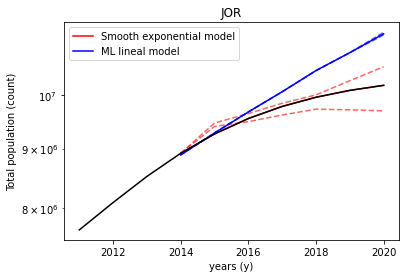

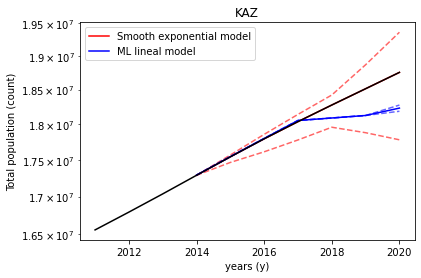

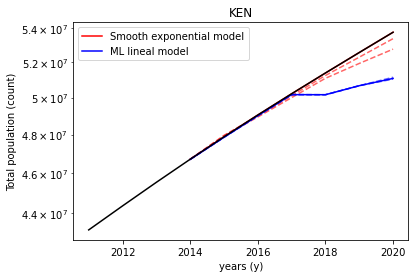

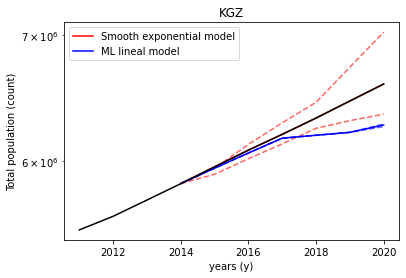

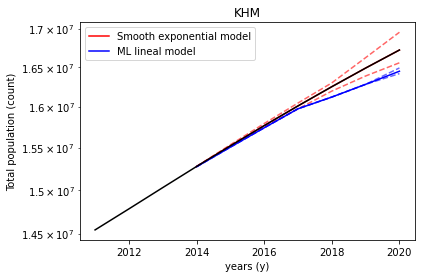

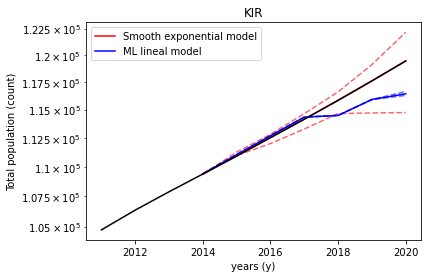

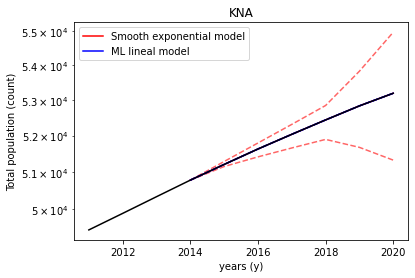

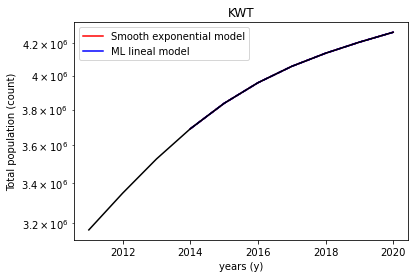

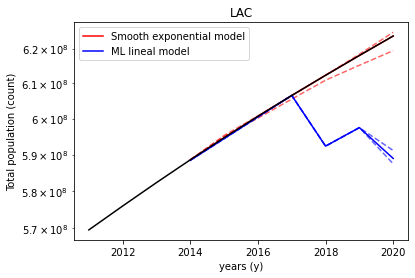

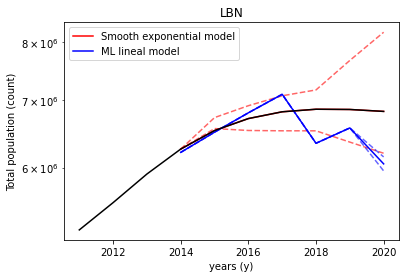

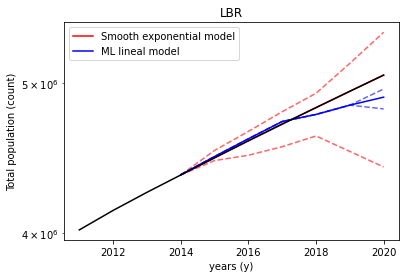

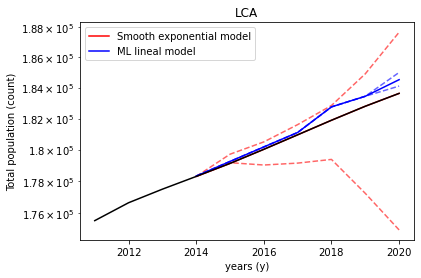

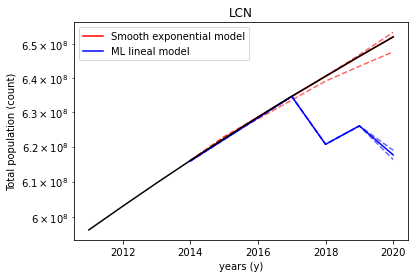

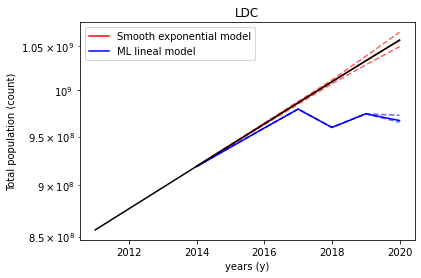

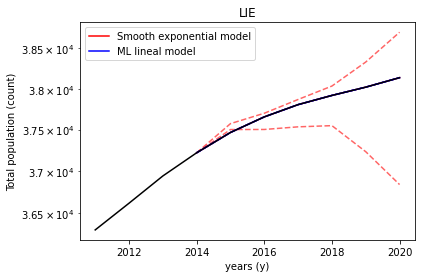

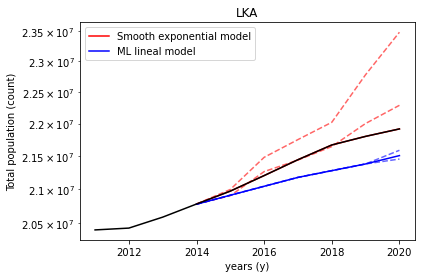

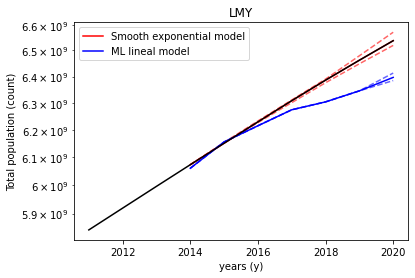

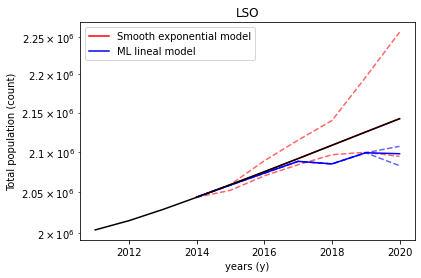

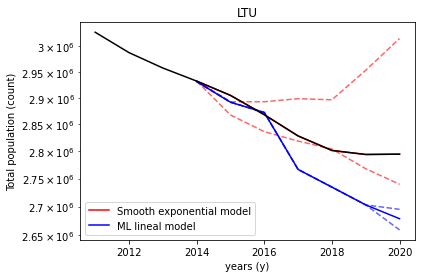

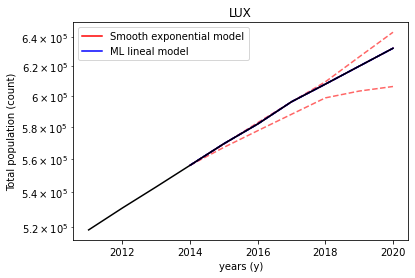

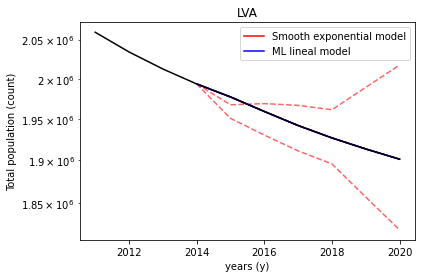

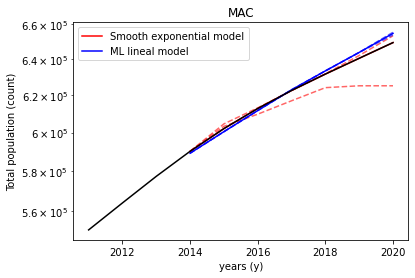

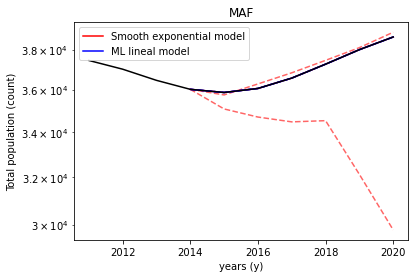

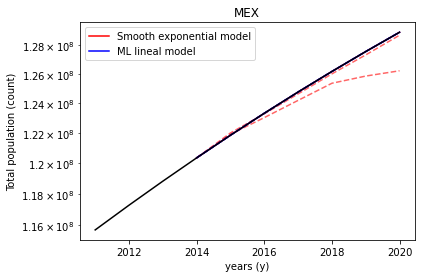

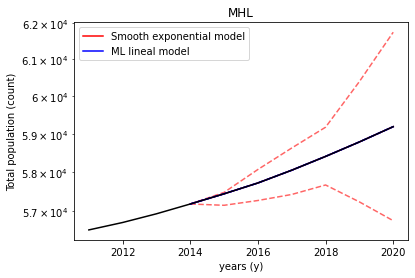

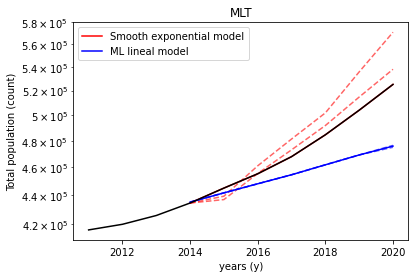

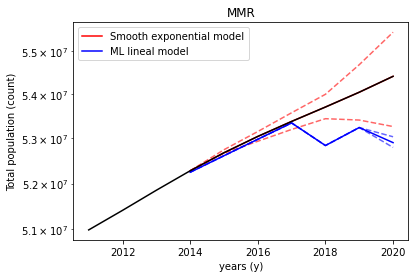

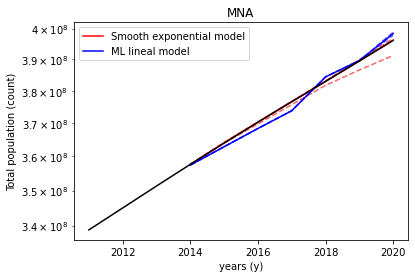

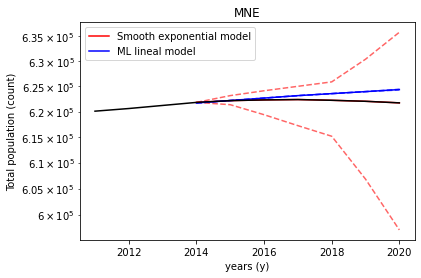

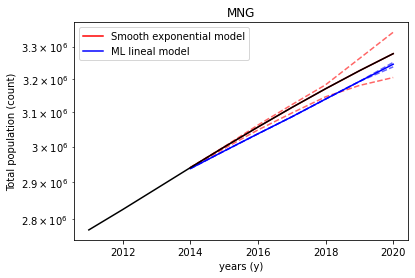

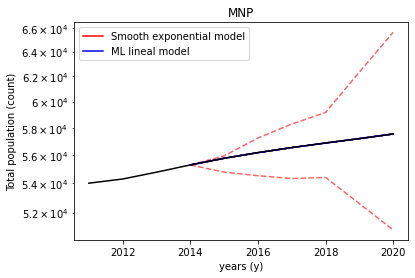

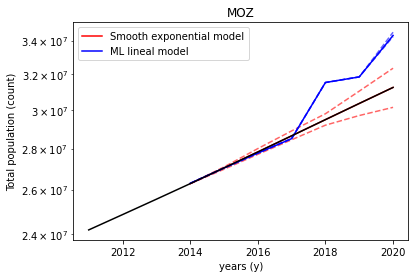

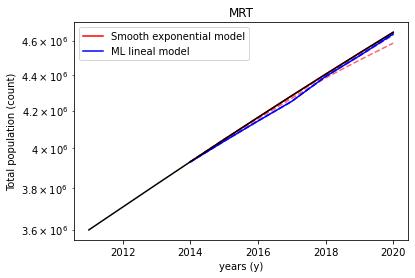

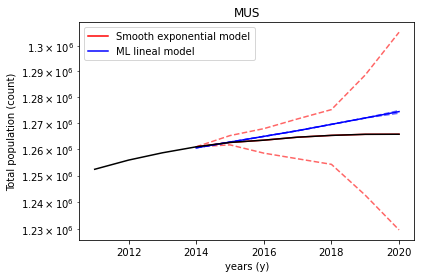

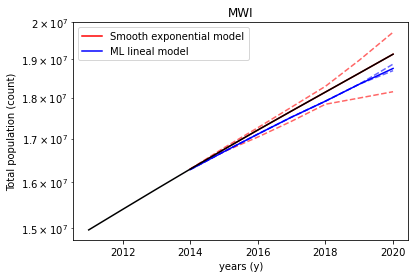

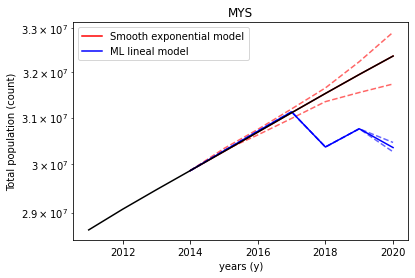

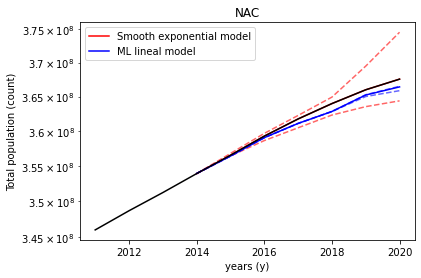

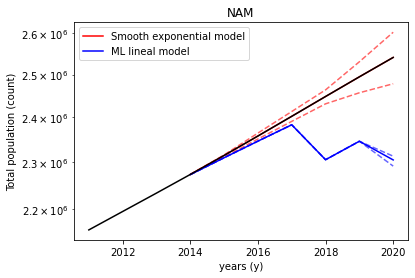

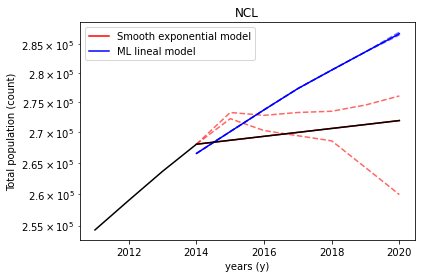

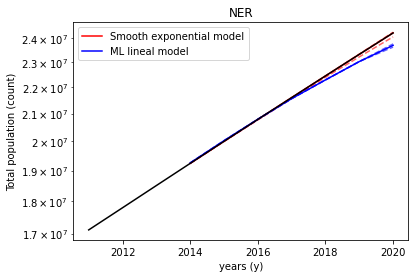

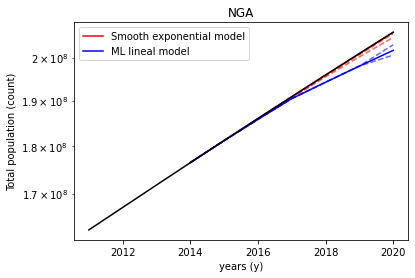

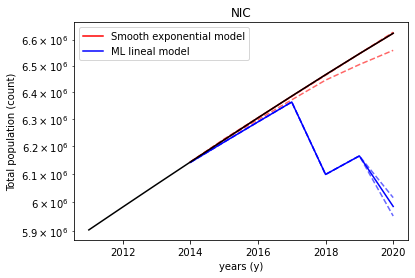

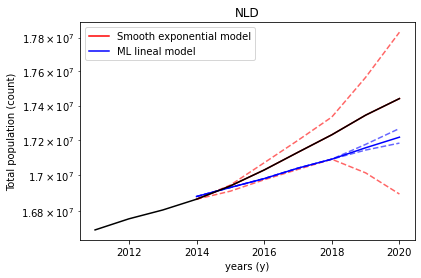

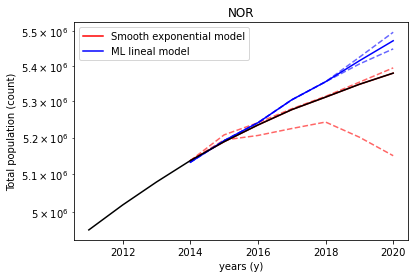

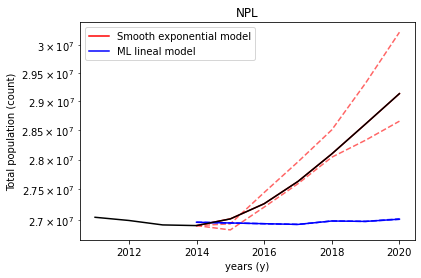

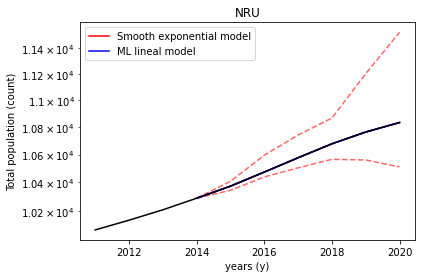

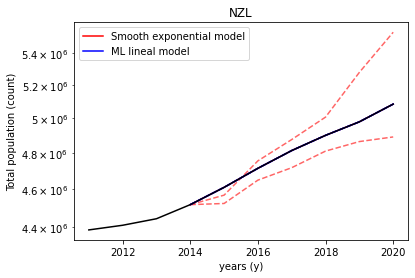

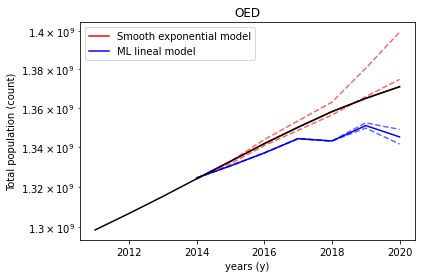

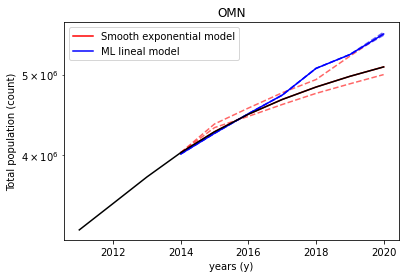

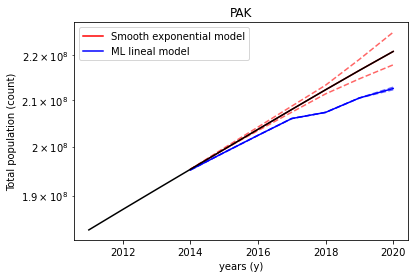

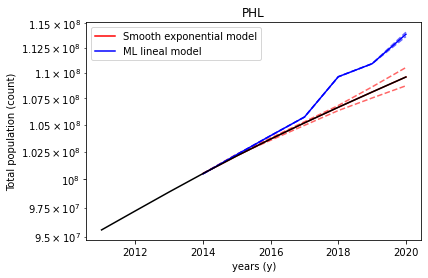

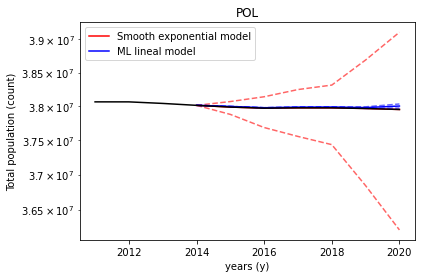

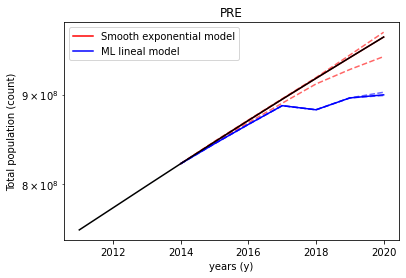

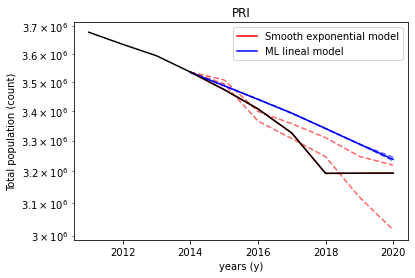

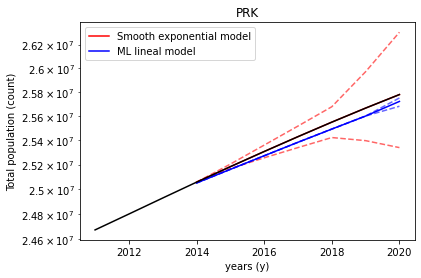

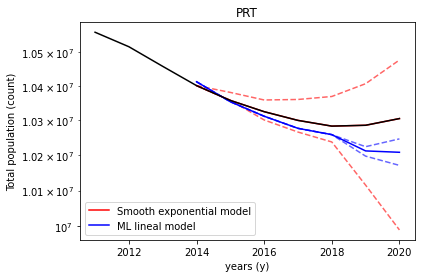

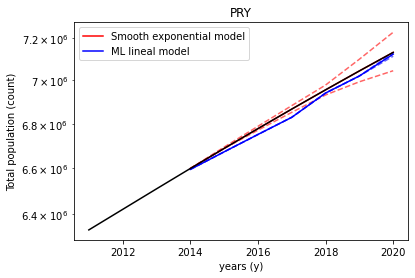

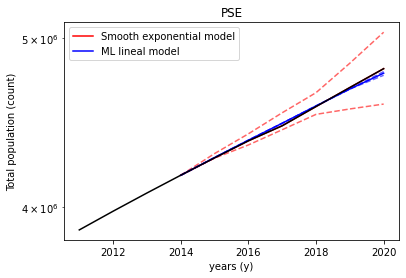

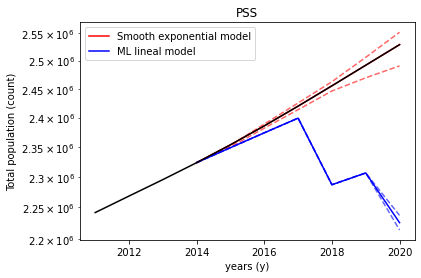

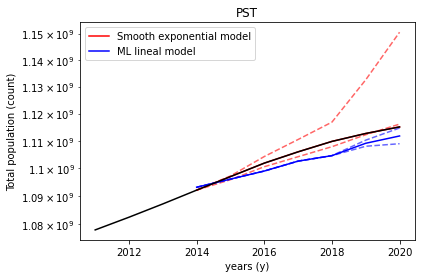

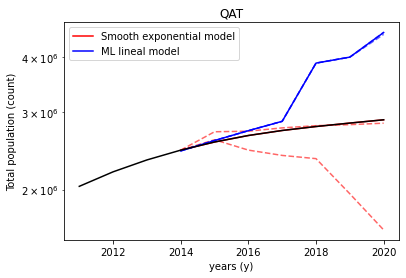

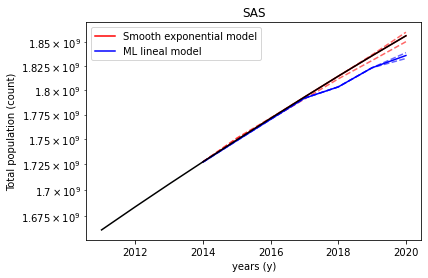

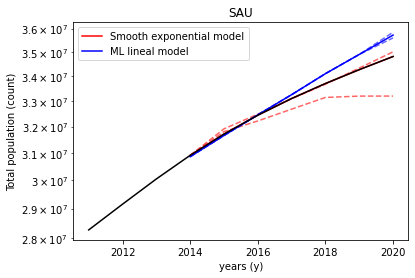

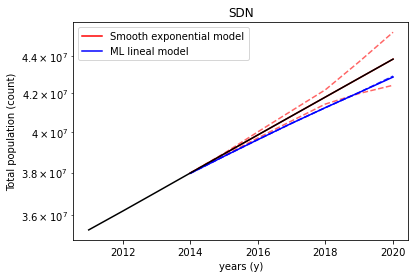

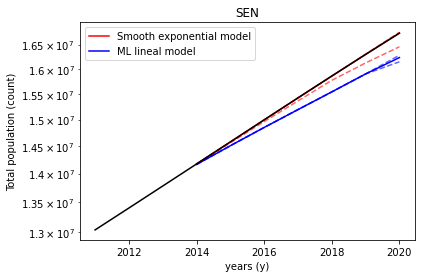

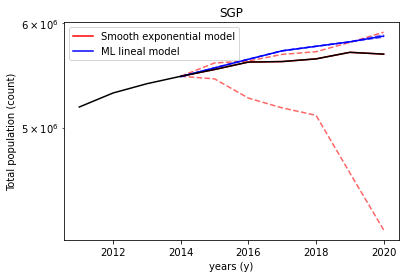

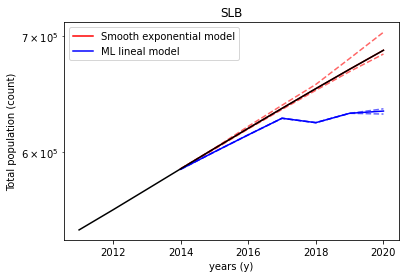

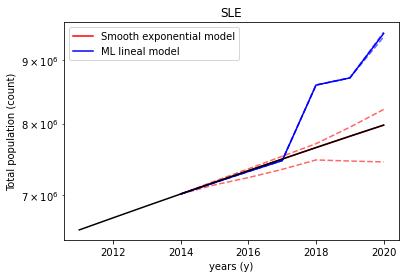

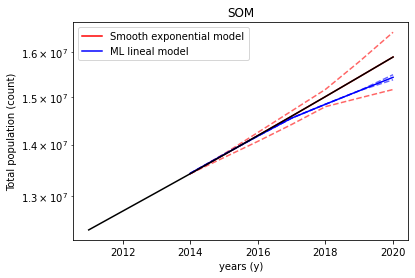

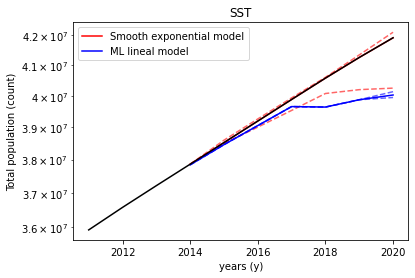

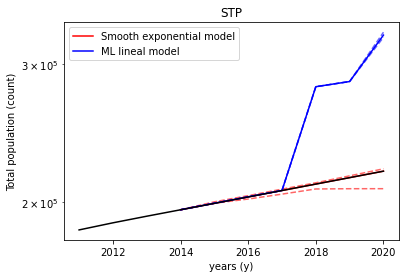

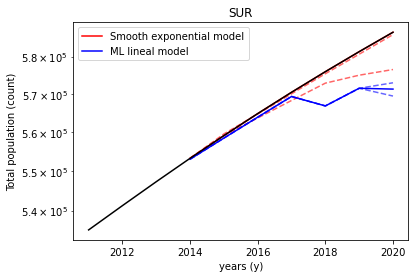

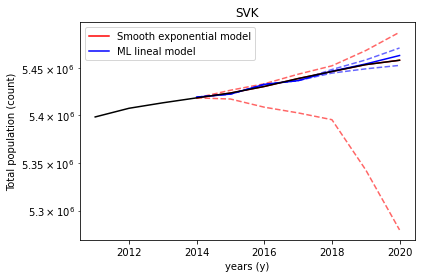

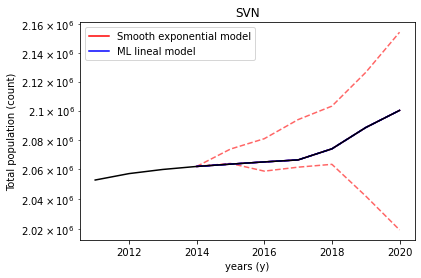

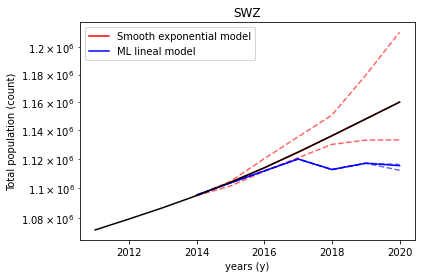

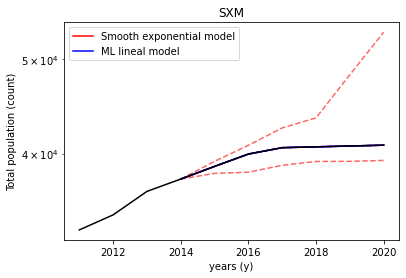

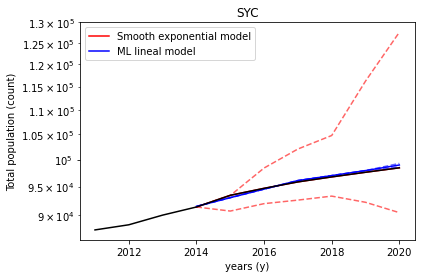

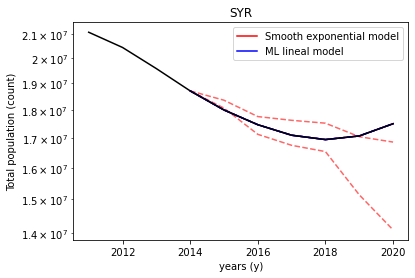

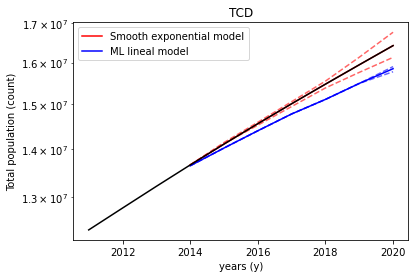

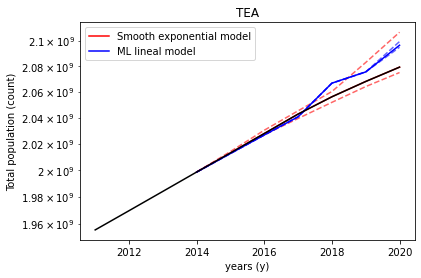

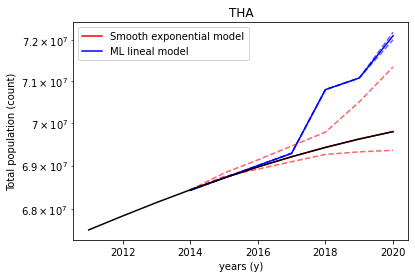

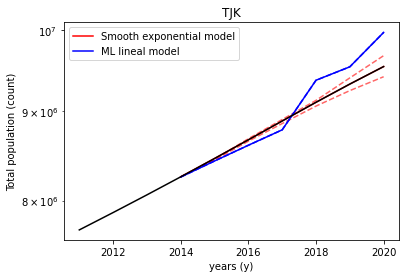

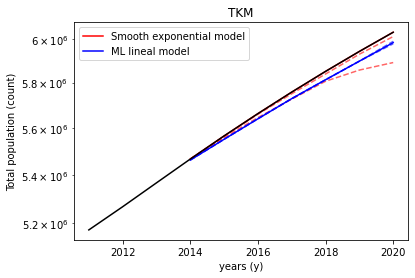

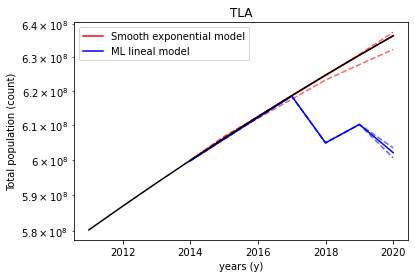

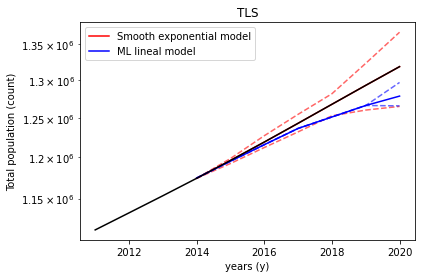

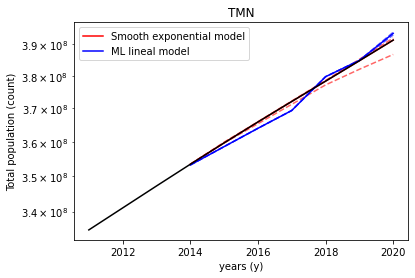

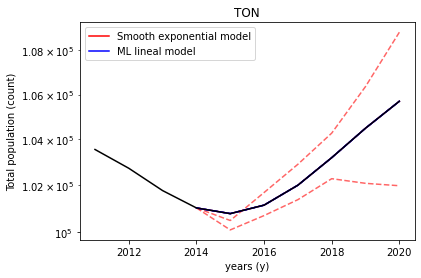

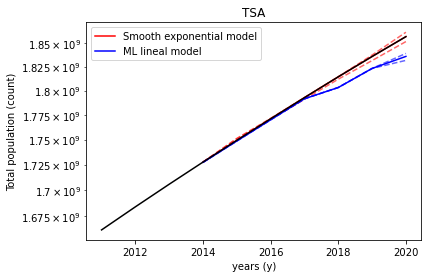

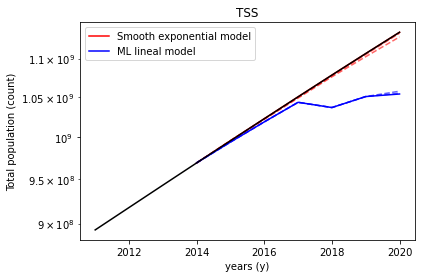

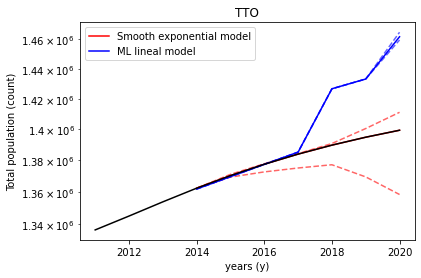

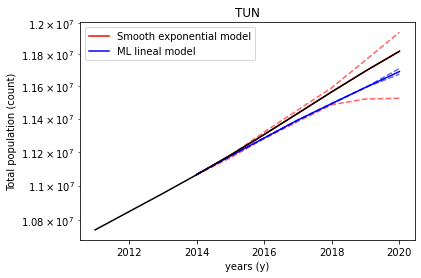

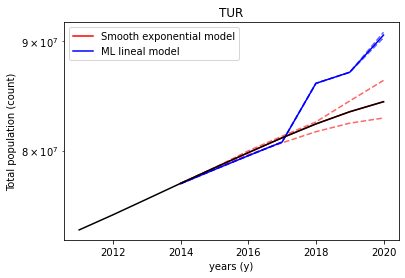

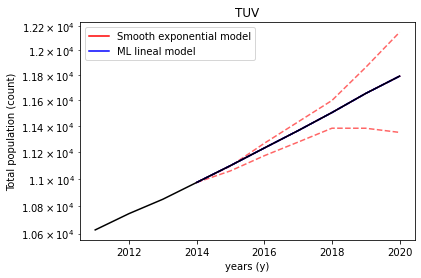

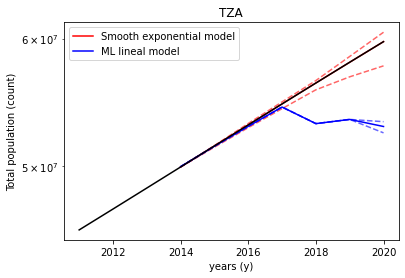

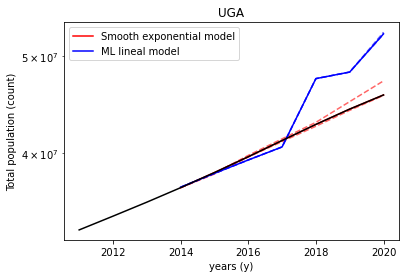

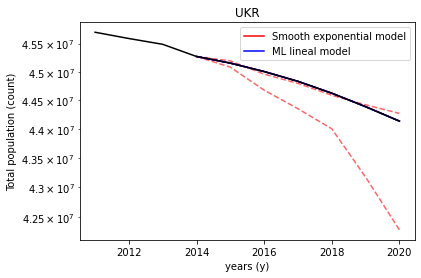

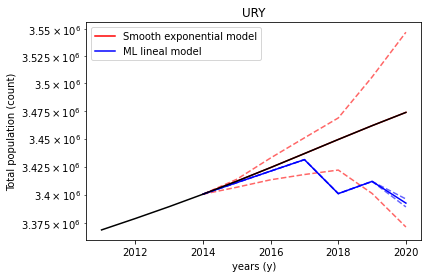

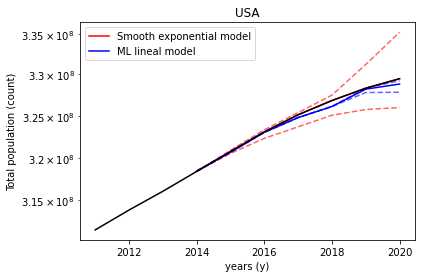

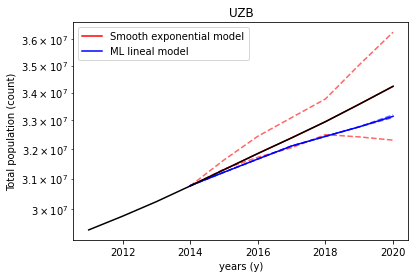

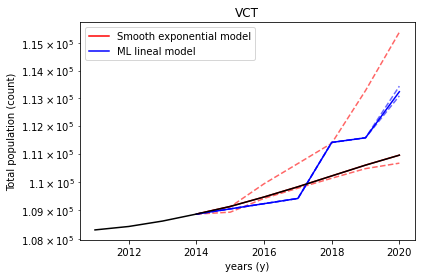

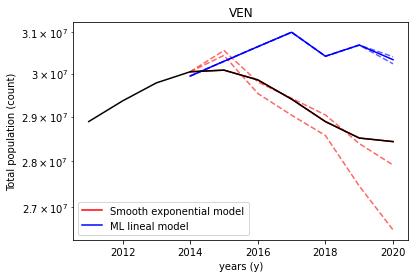

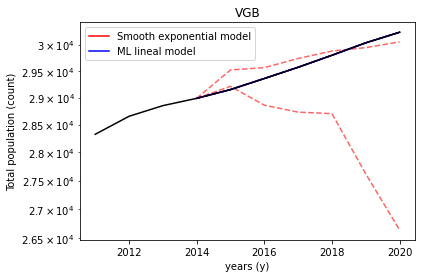

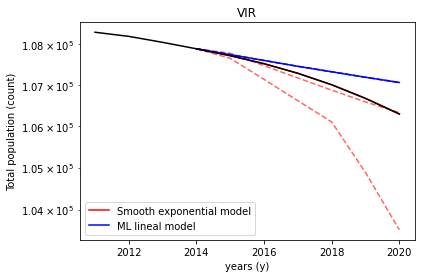

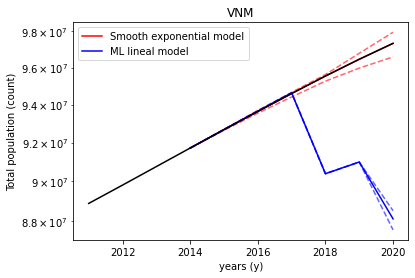

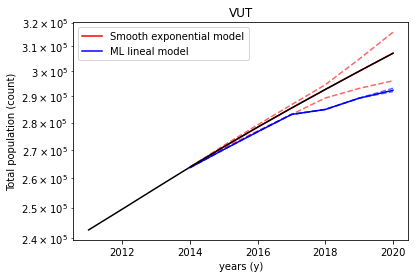

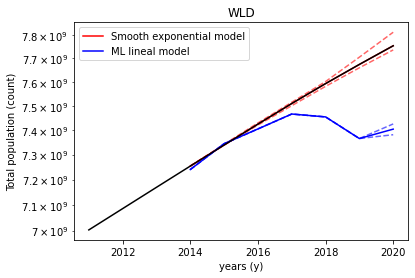

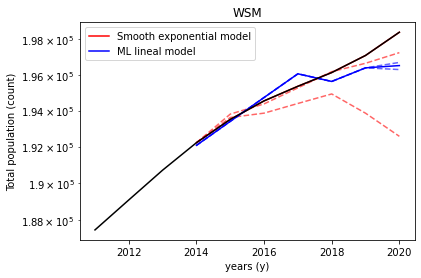

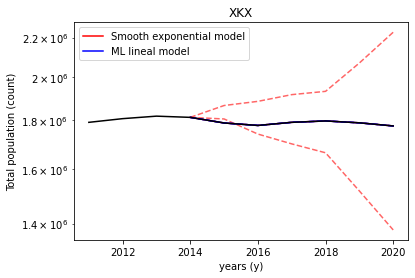

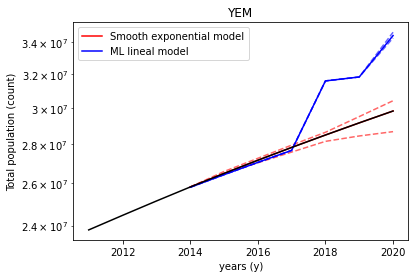

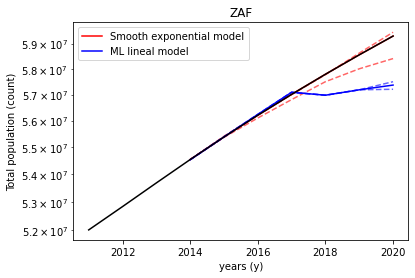

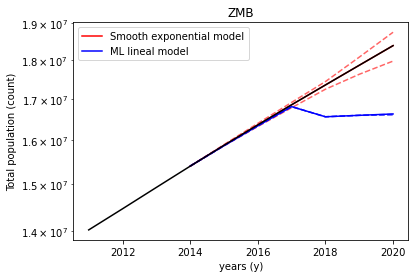

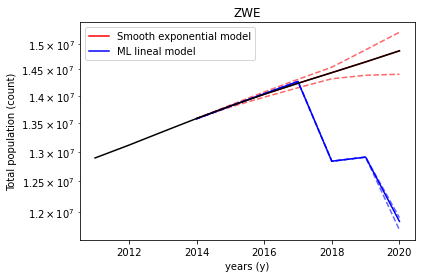

In [15]:
diff_porcentual = []

for country in countries:
    try:

        x = df_all_1[ (df_all_1['date']>x_min) & (df_all_1['countryiso3code'] == country) ]['date']
        
        y_down = df[ (df['date']>2010) & (df['countryiso3code'] == country) ]['value']
        x_down = df[ (df['date']>2010) & (df['countryiso3code'] == country) ]['date']
        
        x_1 = df_all_1[(df_all_1['date']>=x_min)& (df_all_1['date']<=x_max) & (df_all_1['countryiso3code'] == country)]['date']
        y_1 = df_all_1[(df_all_1['date']>=2014)& (df_all_1['date']<=x_max) & (df_all_1['countryiso3code'] == country)]['value']
        y_1_min = df_all_1[(df_all_1['date']>=2014)& (df_all_1['date']<=x_max) & (df_all_1['countryiso3code'] == country)]['value_min']
        y_1_max = df_all_1[(df_all_1['date']>=2014)& (df_all_1['date']<=x_max) & (df_all_1['countryiso3code'] == country)]['value_max']
        
        x_2 = df_all_2[(df_all_2['date']>=2014) & (df_all_2['date']<=x_max) & (df_all_2['countryiso3code'] == country)]['date']
        y_2 = df_all_2[(df_all_2['date']>=2014) & (df_all_2['date']<=x_max) & (df_all_2['countryiso3code'] == country)]['value_KNeighbors']
        y_2_min = df_all_2[(df_all_2['date']>=2014) & (df_all_2['date']<=x_max) & (df_all_2['countryiso3code'] == country)]['value_KNeighbors_min']
        y_2_max = df_all_2[(df_all_2['date']>=2014) & (df_all_2['date']<=x_max) & (df_all_2['countryiso3code'] == country)]['value_KNeighbors_max']
        
        
        
        plt.plot(x_1, y_1, color='red', label = 'Smooth exponential model')
        plt.plot(x_1, y_1_min, color='red', linestyle='dashed', alpha = 0.6)
        plt.plot(x_1, y_1_max, color='red', linestyle='dashed', alpha = 0.6)
        
        plt.plot(x_2, y_2, label='ML lineal model', color='blue')
        plt.plot(x_2, y_2_min, color='blue', linestyle='dashed', alpha = 0.6)
        plt.plot(x_2, y_2_max, color='blue', linestyle='dashed', alpha = 0.6)
        
        plt.plot(x_down, y_down, color='black')
        plt.title(country)
        plt.xlabel('years (y)')
        plt.ylabel('Total population (count)')
        plt.legend()
        
        plt.yscale("log")
        plt.show()
        diff_porcentual.append((y_2.values[-1]-y_1.values[-2])*100/y_2.values[-1])
    except: 
        x = df_all_1[ (df_all_1['date']>x_min) & (df_all_1['countryiso3code'] == country) ]['date']
        
        y_1 = df_all_1[(df_all_1['date']>x_min)& (df_all_1['countryiso3code'] == country)]['value']
        y_1_min = df_all_1[(df_all_1['date']>x_min)& (df_all_1['countryiso3code'] == country)]['value_min']
        y_1_max = df_all_1[(df_all_1['date']>x_min)& (df_all_1['countryiso3code'] == country)]['value_max']
        
        plt.plot(x, y_1, color='red', label = 'lineal')
        plt.plot(x, y_1_min, color='red', linestyle='dashed', alpha = 0.6)
        plt.plot(x, y_1_max, color='red', linestyle='dashed', alpha = 0.6)
        plt.yscale("log")
        plt.legend()
        
        plt.show()

In [17]:
smooth_model['MSE'] = (smooth_model['value'] - smooth_model['value_mean'])**2
smooth_model['MAE'] = (smooth_model['value'] - smooth_model['value_mean']).abs()
smooth_model['MAPE'] = ((smooth_model['value'] - smooth_model['value_mean'])*100/smooth_model['value']).abs()

ml_lineal_model['MSE'] = (ml_lineal_model['value_0'] - ml_lineal_model['value_KNeighbors'])**2
ml_lineal_model['MAE'] = (ml_lineal_model['value_0'] - ml_lineal_model['value_KNeighbors']).abs()
ml_lineal_model['MAPE'] = ((ml_lineal_model['value_0'] - ml_lineal_model['value_KNeighbors'])*100/ml_lineal_model['value_0']).abs()

In [47]:
errors_smooth_per_year = smooth_model[ (smooth_model['date']>=2015) & (smooth_model['date']< 2020) ].groupby(by='date').sum()[['MSE', 'MAE', 'MAPE']]
errors_smooth_per_year.to_csv('errors_smooth_per_year.csv')

In [48]:
errors_ml_lineal_per_year = ml_lineal_model[ (ml_lineal_model['date']>=2015) & (ml_lineal_model['date']< 2020) ].groupby(by='date').sum()[['MSE', 'MAE', 'MAPE']]
errors_ml_lineal_per_year.to_csv('errors_ml_lineal_per_year.csv')

In [19]:
ml_lineal_model.groupby('date')